**_NOTE:_** V1_Fruit_type_classifier 

Ml workflow - based on 

1. Looking at the big picture.
2. Get the data.
3. Discover and visualize the data to gain insights.
4. Prepare the data for Machine Learning algorithms.
5. Select a model and train it.
6. Fine-tune your model.
7. Present your solution.
8. Launch, monitor, and maintain your system

# PROJECT STEPS
- Reading the data set and Introduction
- Exploratory Data Analysis with Pandas and NumPy
- Data Preparation using Sklearn
- Selecting and Training a few Machine Learning Models
- Cross-Validation and Hyperparameter Tuning using Sklearn
- eploying the Final Trained Model

## Looking at the big picture:

The problem: Fruits are often hard to classify manually given the wide variety of types, creating an automated classifier could help in the future, so that this task can be done instantly, the proposed dataset : <b> <i> Fruits 360 </i></b> , provides a lot of data to work with.

## Fruit Type Classification

Fruits 360 is a dataset with images of fruits, vegetables, and other plants

In [1]:
# Loading the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import os 

#matplotlib styles
plt.style.use(['ggplot'])

In [2]:
train_dir = 'data/fruits-360/Training'
test_dir = 'data/fruits-360/Test/'

labels = list(filter(lambda x: os.path.isdir(os.path.join(train_dir, x)), os.listdir(train_dir)))
labels

# Listing all the fruits in the dataset

['Limes',
 'Nut Forest',
 'Apple Granny Smith',
 'Cherry Rainier',
 'Strawberry',
 'Dates',
 'Raspberry',
 'Onion White',
 'Kohlrabi',
 'Pear Kaiser',
 'Tomato not Ripened',
 'Potato White',
 'Pear',
 'Tangelo',
 'Pepino',
 'Lemon Meyer',
 'Apple Red 3',
 'Tamarillo',
 'Cucumber Ripe',
 'Strawberry Wedge',
 'Kumquats',
 'Plum 3',
 'Maracuja',
 'Mangostan',
 'Kaki',
 'Onion Red Peeled',
 'Onion Red',
 'Mango',
 'Rambutan',
 'Pomegranate',
 'Banana Red',
 'Clementine',
 'Peach Flat',
 'Walnut',
 'Kiwi',
 'Pear 2',
 'Cherry Wax Black',
 'Pomelo Sweetie',
 'Potato Sweet',
 'Lychee',
 'Quince',
 'Grapefruit Pink',
 'Chestnut',
 'Pitahaya Red',
 'Tomato Cherry Red',
 'Grape Blue',
 'Pear Williams',
 'Grape White 2',
 'Pepper Orange',
 'Apple Golden 2',
 'Fig',
 'Apple Golden 1',
 'Tomato 2',
 'Pepper Red',
 'Pear Red',
 'Pear Stone',
 'Cherry Wax Yellow',
 'Apple Red Yellow 1',
 'Apple Braeburn',
 'Grape White',
 'Avocado',
 'Salak',
 'Hazelnut',
 'Tomato Maroon',
 'Tomato Yellow',
 'Apple R

In [3]:
print(f"The are: {len(labels)} fruits to classify")

The are: 131 fruits to classify


The folder " meta " contains some extra information on a given fruit , for example :

## Exploratory Data Analysis

Answering a few questions with EDA
- Which fruit is the most common?
- Printing a random fruit for each type

Printing random fruits:

In [4]:
sorted_fruits = sorted(os.listdir(train_dir))
sorted_fruits

['Apple Braeburn',
 'Apple Crimson Snow',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith',
 'Apple Pink Lady',
 'Apple Red 1',
 'Apple Red 2',
 'Apple Red 3',
 'Apple Red Delicious',
 'Apple Red Yellow 1',
 'Apple Red Yellow 2',
 'Apricot',
 'Avocado',
 'Avocado ripe',
 'Banana',
 'Banana Lady Finger',
 'Banana Red',
 'Beetroot',
 'Blueberry',
 'Cactus fruit',
 'Cantaloupe 1',
 'Cantaloupe 2',
 'Carambula',
 'Cauliflower',
 'Cherry 1',
 'Cherry 2',
 'Cherry Rainier',
 'Cherry Wax Black',
 'Cherry Wax Red',
 'Cherry Wax Yellow',
 'Chestnut',
 'Clementine',
 'Cocos',
 'Corn',
 'Corn Husk',
 'Cucumber Ripe',
 'Cucumber Ripe 2',
 'Dates',
 'Eggplant',
 'Fig',
 'Ginger Root',
 'Granadilla',
 'Grape Blue',
 'Grape Pink',
 'Grape White',
 'Grape White 2',
 'Grape White 3',
 'Grape White 4',
 'Grapefruit Pink',
 'Grapefruit White',
 'Guava',
 'Hazelnut',
 'Huckleberry',
 'Kaki',
 'Kiwi',
 'Kohlrabi',
 'Kumquats',
 'Lemon',
 'Lemon Meyer',
 'Limes',
 'Lychee',
 'M

Now, let's visualize a random image from each of each fruit type:

In [5]:

def print_fruits(rows,cols,  fruit_id = 0):
  sorted_fruits = sorted(os.listdir(train_dir))
  sorted_fruits
  for i in range(rows):
    for j in range(cols):
      try:
        selected_fruit = sorted_fruits[fruit_id] 
        fruit_id += 1
      except:
        break
      if selected_fruit == '.temp_store':
          continue
      food_selected_images = os.listdir(os.path.join(train_dir,selected_fruit)) 
      food_selected_random = np.random.choice(food_selected_images)
      img = plt.imread(os.path.join(train_dir,selected_fruit, food_selected_random))

      ax[i][j].imshow(img)
      ax[i][j].set_title(selected_fruit, pad = 10)

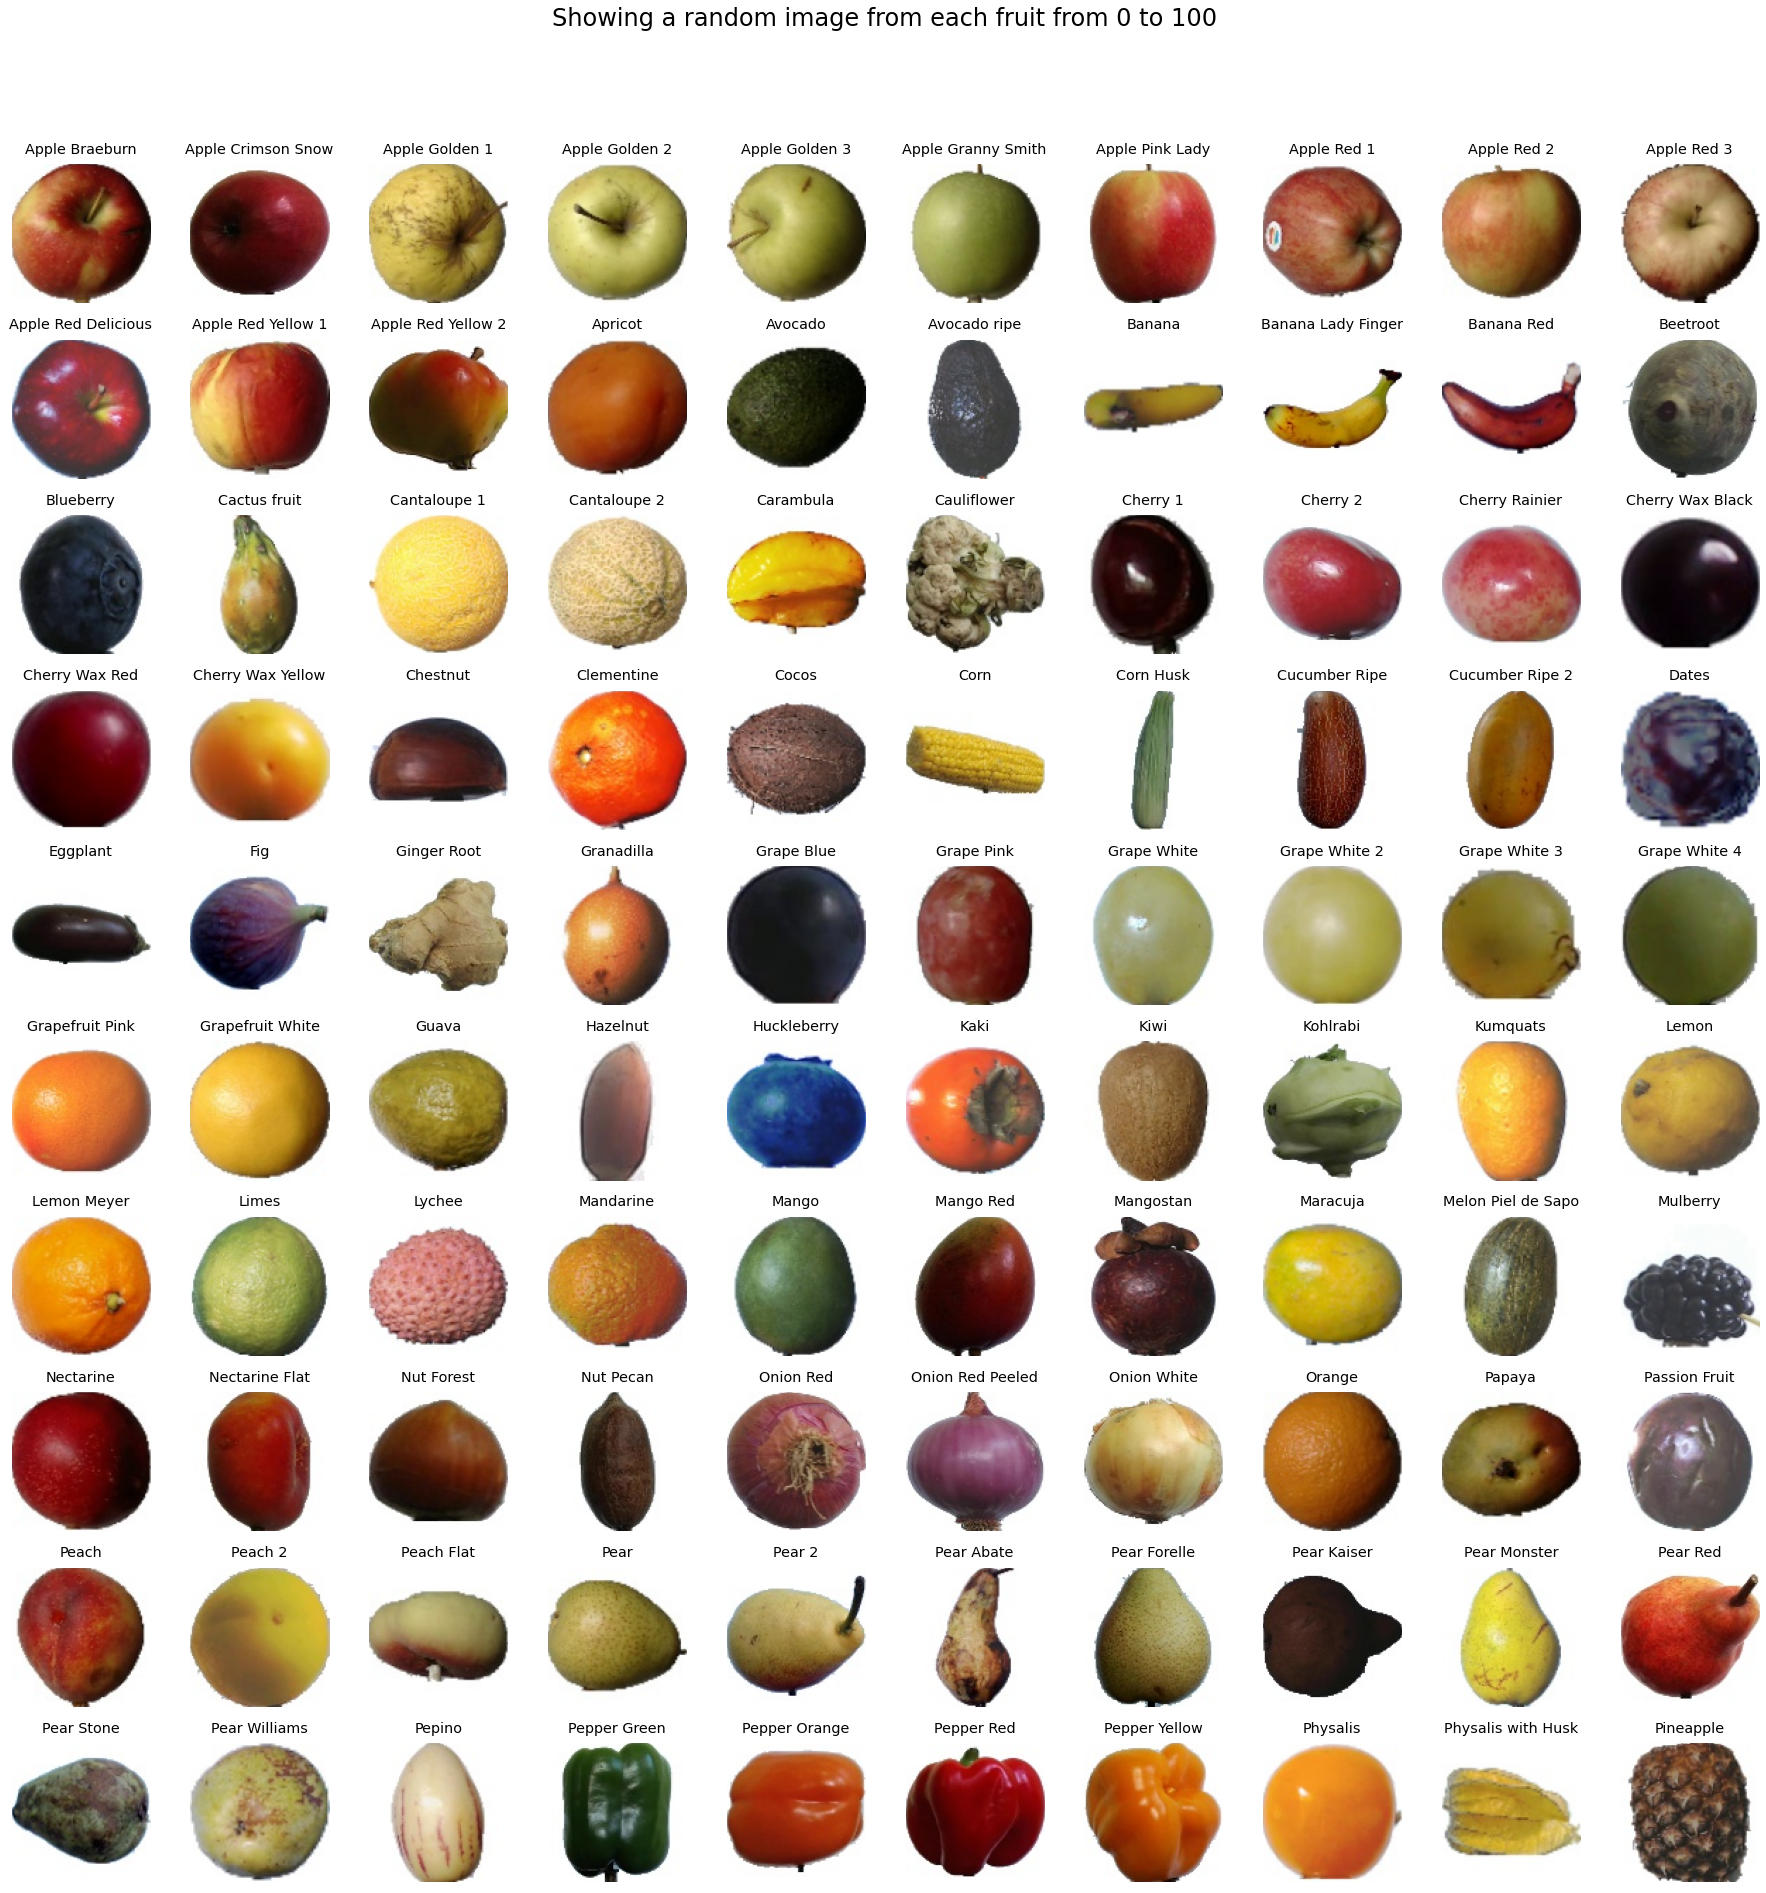

In [6]:
rows = 10
cols = 10
# 10 x 10 fruit grid
fig,ax = plt.subplots(rows,cols,figsize =(25,25))

fig.suptitle('Showing a random image from each fruit from 0 to 100',y=1.05,fontsize=24)

print_fruits(rows,cols,0) # start from 0
plt.setp(ax, xticks=[],yticks=[])
plt.tight_layout()
# https://matplotlib.org/users/tight_layout_guide.html



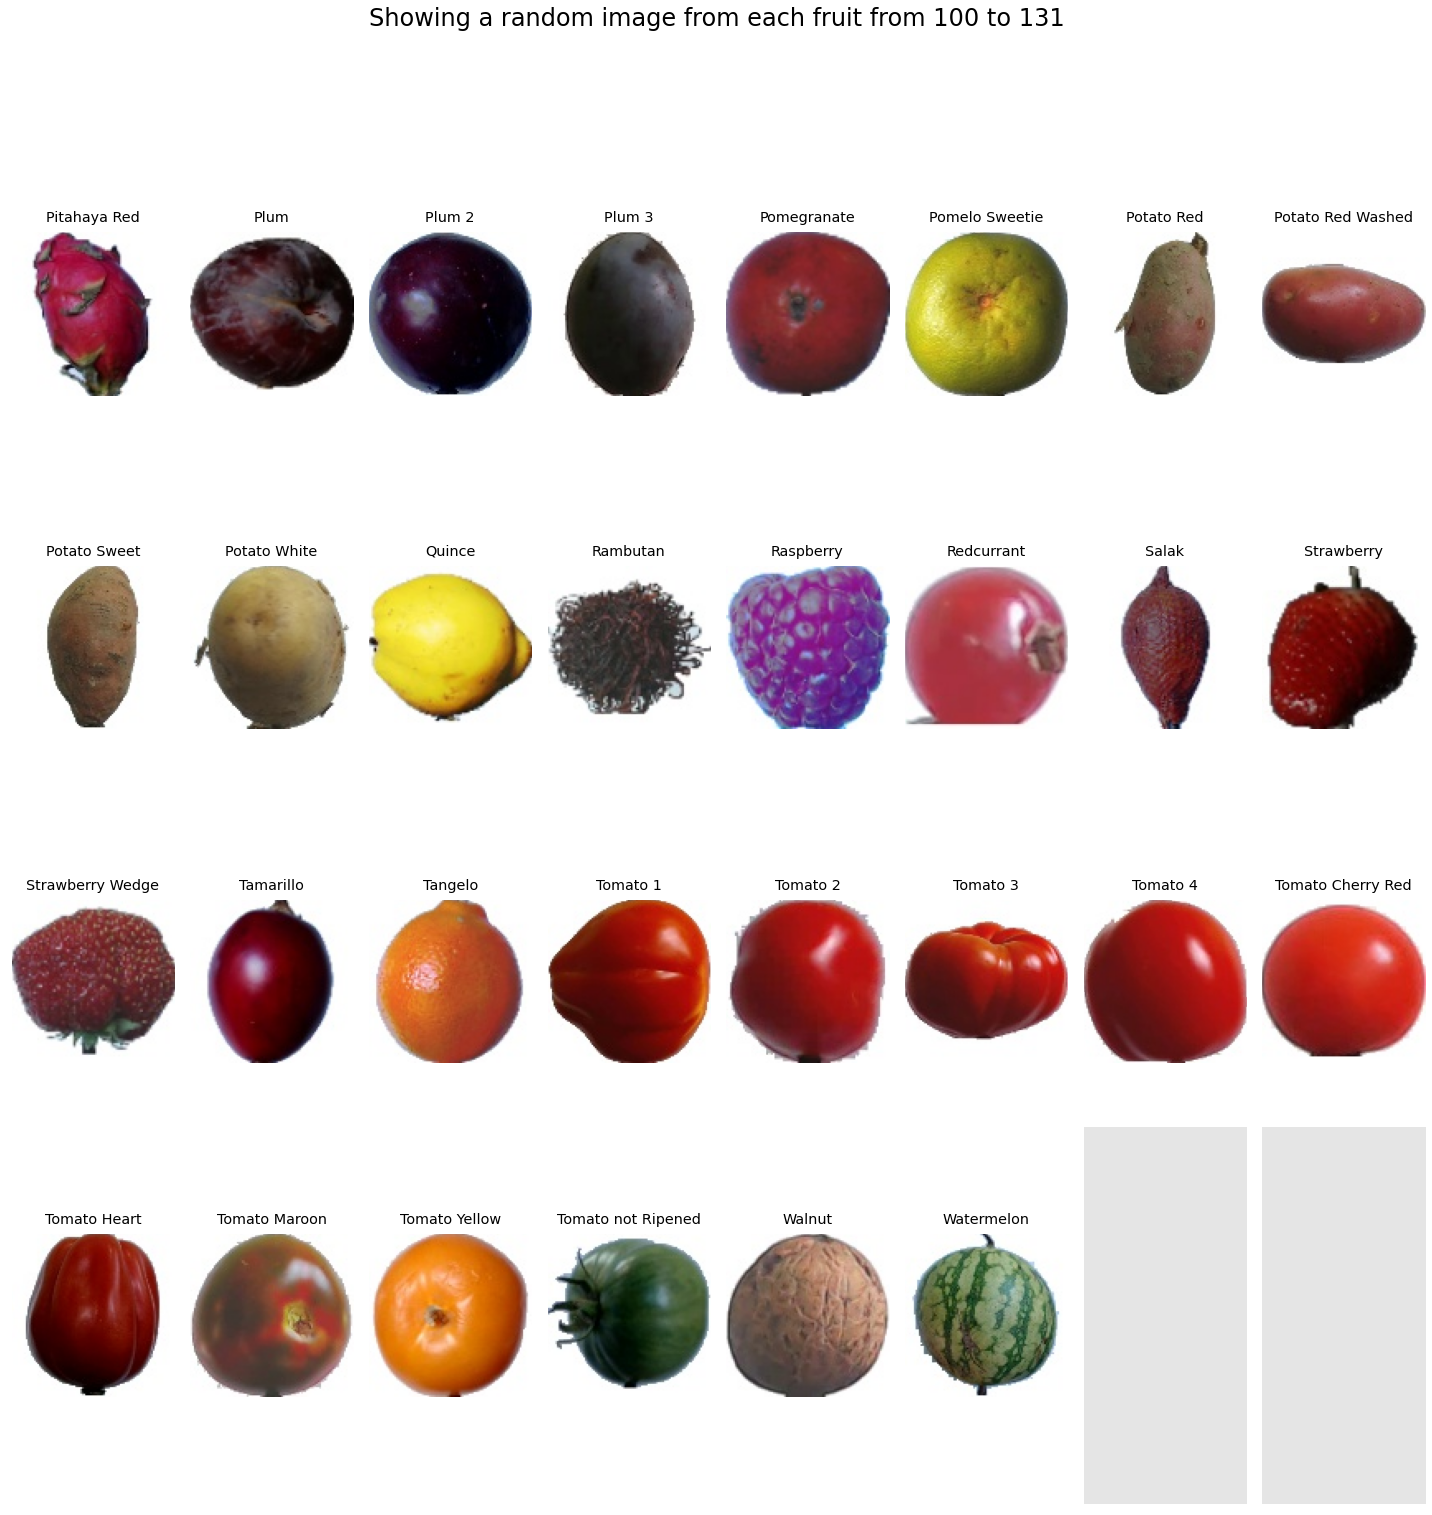

In [7]:
rows = 4
cols = 8
# 10 x 10 fruit grid
fig,ax = plt.subplots(rows,cols,figsize =(20,20))

fig.suptitle('Showing a random image from each fruit from 100 to 131',y=1.05,fontsize=24)

print_fruits(rows,cols,101) # start from 101
plt.setp(ax, xticks=[],yticks=[])
plt.tight_layout()
# https://matplotlib.org/users/tight_layout_guide.html


In [8]:
import pandas as pd

## Which fruit is more common ?

In [9]:
train_count = {}
test_count = {}
count_validation = {}
count_total = {}

# 
for fruit in labels:
    train_count[fruit] = len(os.listdir(os.path.join(train_dir,fruit)))
    test_count[fruit] = len(os.listdir(os.path.join(test_dir,fruit)))

count_total['Test'] = test_count
count_total['Training'] = train_count



df = pd.DataFrame.from_dict(count_total)


In [10]:
import seaborn as sns

<AxesSubplot:>

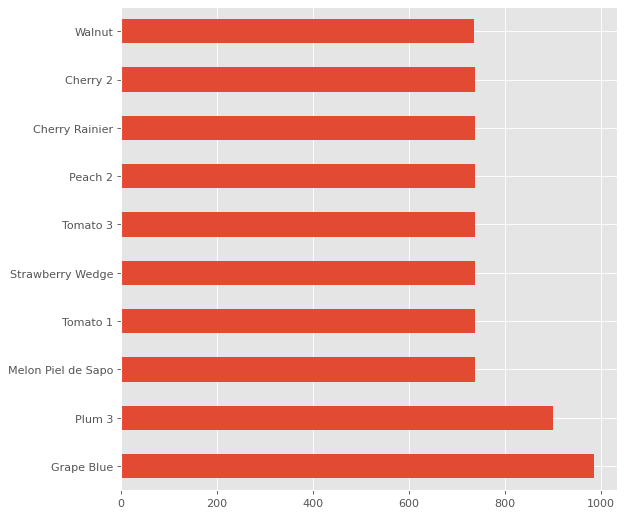

In [11]:
from matplotlib.pyplot import figure
figure(figsize=(8, 8), dpi=80)

df['Training'].sort_values(ascending=False).head(10).plot(kind='barh')

`Grape Blue` seems to be the fruit with the most data.

<AxesSubplot:>

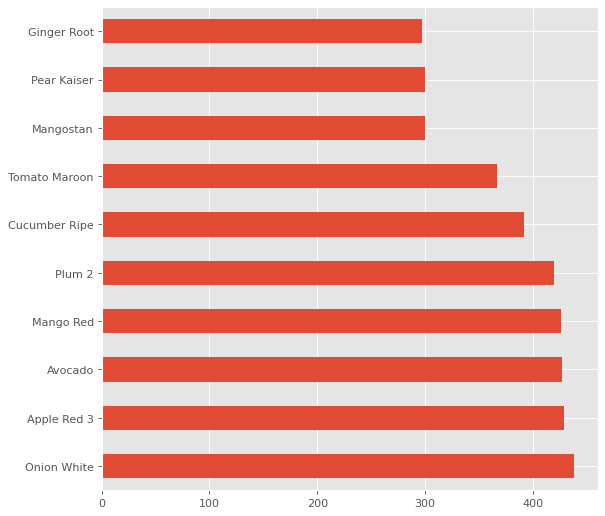

In [12]:

figure(figsize=(8, 8), dpi=80)

df['Training'].sort_values(ascending=False).tail(10).plot(kind='barh')




`Ginger Root ` , seems to be the fruit with the least ammount of data.

## Loading the data and Transfer Learning test

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import preprocess_input


In [14]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    train_dir,
    target_size=(100, 100),
    batch_size=32
)

Found 67692 images belonging to 131 classes.


In [15]:
train_ds.class_indices


{'Apple Braeburn': 0,
 'Apple Crimson Snow': 1,
 'Apple Golden 1': 2,
 'Apple Golden 2': 3,
 'Apple Golden 3': 4,
 'Apple Granny Smith': 5,
 'Apple Pink Lady': 6,
 'Apple Red 1': 7,
 'Apple Red 2': 8,
 'Apple Red 3': 9,
 'Apple Red Delicious': 10,
 'Apple Red Yellow 1': 11,
 'Apple Red Yellow 2': 12,
 'Apricot': 13,
 'Avocado': 14,
 'Avocado ripe': 15,
 'Banana': 16,
 'Banana Lady Finger': 17,
 'Banana Red': 18,
 'Beetroot': 19,
 'Blueberry': 20,
 'Cactus fruit': 21,
 'Cantaloupe 1': 22,
 'Cantaloupe 2': 23,
 'Carambula': 24,
 'Cauliflower': 25,
 'Cherry 1': 26,
 'Cherry 2': 27,
 'Cherry Rainier': 28,
 'Cherry Wax Black': 29,
 'Cherry Wax Red': 30,
 'Cherry Wax Yellow': 31,
 'Chestnut': 32,
 'Clementine': 33,
 'Cocos': 34,
 'Corn': 35,
 'Corn Husk': 36,
 'Cucumber Ripe': 37,
 'Cucumber Ripe 2': 38,
 'Dates': 39,
 'Eggplant': 40,
 'Fig': 41,
 'Ginger Root': 42,
 'Granadilla': 43,
 'Grape Blue': 44,
 'Grape Pink': 45,
 'Grape White': 46,
 'Grape White 2': 47,
 'Grape White 3': 48,
 'Grap

`Grape Blue` seems to be the fruit with the most data.

In [16]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)


Found 22688 images belonging to 131 classes.


In [17]:

from tensorflow import keras
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions


In [18]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(100, 100, 3)
)

base_model.trainable = False



inputs = keras.Input(shape=(100, 100, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(131)(vectors)

model = keras.Model(inputs, outputs)


2021-12-04 20:30:56.322360: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-04 20:30:56.396040: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-04 20:30:56.396336: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-04 20:30:56.397634: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [19]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])


In [21]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)


Epoch 1/10


2021-12-04 20:31:11.613292: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8204
2021-12-04 20:31:12.358194: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2021-12-04 20:31:12.358548: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2021-12-04 20:31:12.358569: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2021-12-04 20:31:12.358948: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2021-12-04 20:31:12.358989: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


2116/2116 [==============================] - 87s 39ms/step - loss: 0.7242 - accuracy: 0.9146 - val_loss: 3.5450 - val_accuracy: 0.7438
Epoch 2/10
2116/2116 [==============================] - 82s 39ms/step - loss: 0.2689 - accuracy: 0.9757 - val_loss: 4.9156 - val_accuracy: 0.7302
Epoch 3/10
2116/2116 [==============================] - 82s 39ms/step - loss: 0.2205 - accuracy: 0.9832 - val_loss: 4.9055 - val_accuracy: 0.7913
Epoch 4/10
2116/2116 [==============================] - 82s 39ms/step - loss: 0.1798 - accuracy: 0.9873 - val_loss: 5.4486 - val_accuracy: 0.7783
Epoch 5/10
2116/2116 [==============================] - 82s 39ms/step - loss: 0.1463 - accuracy: 0.9914 - val_loss: 6.2237 - val_accuracy: 0.7791
Epoch 6/10
2116/2116 [==============================] - 82s 39ms/step - loss: 0.1446 - accuracy: 0.9918 - val_loss: 7.4158 - val_accuracy: 0.7753
Epoch 7/10
2116/2116 [==============================] - 82s 39ms/step - loss: 0.1283 - accuracy: 0.9933 - val_loss: 9.4995 - val_accura

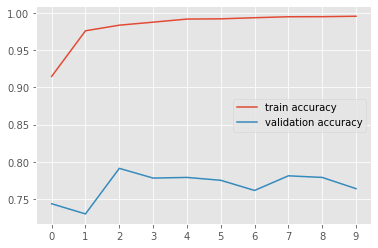

In [22]:
#plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['accuracy'], label='train accuracy')

plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xticks(np.arange(10))
plt.legend()


In [23]:
model.save('data/models/')


2021-12-04 20:47:48.266997: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: data/models/assets


/home/elegant00/.local/lib/python3.9/site-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/home/elegant00/.local/lib/python3.9/site-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


In [27]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 xception (Functional)       (None, 3, 3, 2048)        20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 131)               268419    
                                                                 
Total params: 21,129,899
Trainable params: 268,419
Non-trainable params: 20,861,480
_________________________________________________________________


In [35]:
from sklearn.datasets import load_files
model.evaluate(val_ds)


709/709 [==============================] - 33s 47ms/step - loss: 10.3138 - accuracy: 0.7641


[10.313756942749023, 0.7640603184700012]

The non-tuned model of X-ceptionV3 obtained an accuracy of `0.7641`  with the validation dataset, this should be improved with hyperparameter tunning.

In [94]:
path = 'data/fruits-360/Test/Apple Red 3/4_100.jpg'

In [93]:
from tensorflow.keras.preprocessing.image import load_img


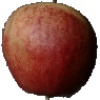

In [92]:
img = load_img(path, target_size=(100, 100))
img

In [95]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 100, 100, 3)

In [88]:
X = preprocess_input(X)


In [89]:
pred = model.predict(X)


In [90]:
d = dict(zip(labels, pred[0]))


In [91]:
sorted(d.items(), key=lambda x: x[1], reverse=True)


[('Pear Kaiser', 147.99533),
 ('Plum', 113.08474),
 ('Strawberry', 108.33511),
 ('Apple Red Yellow 2', 94.30792),
 ('Nut Forest', 88.15695),
 ('Potato White', 76.25428),
 ('Onion White', 75.34192),
 ('Kohlrabi', 63.519527),
 ('Mulberry', 56.91595),
 ('Huckleberry', 46.856426),
 ('Apple Crimson Snow', 45.550747),
 ('Limes', 43.049408),
 ('Nectarine Flat', 34.742893),
 ('Salak', 19.953863),
 ('Pear Forelle', 18.156496),
 ('Tomato 3', 14.595374),
 ('Apple Golden 2', 8.7342),
 ('Grape White 3', 8.635105),
 ('Banana', 8.498153),
 ('Grape Blue', 6.291083),
 ('Dates', 5.313669),
 ('Cactus fruit', -2.9928591),
 ('Guava', -4.6019073),
 ('Pineapple Mini', -5.8094087),
 ('Tomato 2', -5.998324),
 ('Rambutan', -6.409274),
 ('Pepper Green', -7.378683),
 ('Beetroot', -15.879245),
 ('Potato Sweet', -19.839659),
 ('Pear Williams', -21.076109),
 ('Raspberry', -26.294535),
 ('Papaya', -30.02192),
 ('Physalis', -35.695557),
 ('Pepino', -37.980095),
 ('Pear Red', -38.986996),
 ('Quince', -42.643684),
 ('Pe